In [1]:
import torch

In [2]:
x= torch.arange(12,dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [5]:
x = x.reshape(3,4)
x

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [8]:
x = x.reshape(-1,4)
x

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [6]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [9]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [12]:
torch.randn(3,4)

tensor([[-1.1424, -1.3067,  1.3746,  1.3230],
        [ 0.5530,  1.7014,  0.5245, -0.9339],
        [-0.2389, -0.8243,  1.3443, -0.8207]])

Indexing and Slicing

In [11]:
x[-1]

tensor([ 8.,  9., 10., 11.])

In [13]:
x[1:3]

tensor([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [14]:
torch.exp(x)

tensor([[1.0000e+00, 2.7183e+00, 7.3891e+00, 2.0086e+01],
        [5.4598e+01, 1.4841e+02, 4.0343e+02, 1.0966e+03],
        [2.9810e+03, 8.1031e+03, 2.2026e+04, 5.9874e+04]])

In [15]:
#Operations

X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [21]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [22]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

Excercise 2.1.8

In [1]:
#1
import torch
X = torch.tensor([1,2,3,4,5])
Y = torch.tensor([i for i in range(10,15)])
X == Y
X < Y

In [9]:
#2
a = torch.arange(3).reshape((3,1))
b = torch.arange(4).reshape((2,2))

Data Preprocessing

In [1]:
import os
os.makedirs(os.path.join('..','data'),exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')

with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
    NA,NA,127500
    2,NA,106000
    4,Slate,178100
    NA,NA,140000''')

In [2]:
import pandas as pd
data = pd.read_csv(data_file)

In [3]:
print(data)

  NumRooms RoofType   Price
0       NA      NaN  127500
1        2      NaN  106000
2        4    Slate  178100
3       NA      NaN  140000


Data Preparation

In [4]:
#iloc - integer location based indexing

In [5]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]

In [7]:
inputs = pd.get_dummies(inputs, dummy_na=True)

In [11]:
print(inputs)

   NumRooms_    2  NumRooms_    4  NumRooms_    NA  NumRooms_nan  \
0               0               0                1             0   
1               1               0                0             0   
2               0               1                0             0   
3               0               0                1             0   

   RoofType_Slate  RoofType_nan  
0               0             1  
1               0             1  
2               1             0  
3               0             1  


In [12]:
inputs = inputs.fillna(inputs.mean())

In [13]:
inputs

,NumRooms_ 2,NumRooms_ 4,NumRooms_ NA,NumRooms_nan,RoofType_Slate,RoofType_nan
0,0,0,1,0,0,1
1,1,0,0,0,0,1
2,0,1,0,0,1,0
3,0,0,1,0,0,1


Conversion to the Tensor Format

In [14]:
import torch

X, y = torch.tensor(inputs.values), torch.tensor(targets.values)

In [16]:
X,y 

(tensor([[0, 0, 1, 0, 0, 1],
         [1, 0, 0, 0, 0, 1],
         [0, 1, 0, 0, 1, 0],
         [0, 0, 1, 0, 0, 1]], dtype=torch.uint8),
 tensor([127500, 106000, 178100, 140000]))

Linear Algebra

In [17]:
#Scalars

In [18]:
import torch

x = torch.tensor(3.0)
y = torch.tensor(2.0)

In [20]:
x + y, x * y, x / y, x ** y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

In [21]:
x = torch.arange(4)

In [23]:
x.shape

torch.Size([4])

Matrices

In [24]:
A = torch.arange(6).reshape(3,-1)

In [25]:
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [26]:
#Transpose
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

In [27]:
#Symmetric matrices are the subset of square matrices that are equal to their own transposes:
A = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
A == A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

Tensors

In [2]:
import torch
torch.arange(24).reshape(3,2,4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]],

        [[16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [3]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone() # Assign a copy of `A` to `B` by allocating new memory
A, A + B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [38]:
A = torch.arange(9, dtype=torch.float32).reshape(3,3)
B = A.clone()

In [39]:
A

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])

In [40]:
A * B

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.],
        [36., 49., 64.]])

In [41]:
torch.mm(A,B)

tensor([[ 15.,  18.,  21.],
        [ 42.,  54.,  66.],
        [ 69.,  90., 111.]])

In [42]:
A.shape

torch.Size([3, 3])

In [43]:
A.sum(axis=0)

tensor([ 9., 12., 15.])

Non-Reduction Sum

In [44]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 3.],
        [12.],
        [21.]])

In [45]:
A.sum()

tensor(36.)

In [46]:
A.cumsum(axis=1)

tensor([[ 0.,  1.,  3.],
        [ 3.,  7., 12.],
        [ 6., 13., 21.]])

Dot Products

In [49]:
y = torch.ones(3, dtype= torch.float32)
x = y.clone()

In [50]:
torch.dot(x,y)

tensor(3.)

Matrix Vector Products

In [51]:
A.shape

torch.Size([3, 3])

In [52]:
x.shape

torch.Size([3])

In [54]:
A@x

tensor([ 3., 12., 21.])

Matrix-Matrix Multiplication

In [55]:
B = torch.ones(3, 4) 

In [56]:
B

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [57]:
torch.mm(A, B)

tensor([[ 3.,  3.,  3.,  3.],
        [12., 12., 12., 12.],
        [21., 21., 21., 21.]])

Norms

Two principal types l2 and l1 norm

l2 is similar to pythagoras theorem
l1 is manhattan distance(absolute sum)



In [60]:
 u  = torch.tensor([3.,5.])

In [61]:
torch.norm(u)

tensor(5.8310)

In [62]:

#l1 norm

torch.abs(u).sum()

tensor(8.)

In [63]:
#Calculating Frobenius norm

torch.norm(torch.ones((4,9)))

tensor(6.)

In [64]:
A = torch.arange(9).reshape(3,3)

In [76]:
B = torch.arange(10,step=3,end=36).reshape(3,3)

In [77]:
B

tensor([[10, 13, 16],
        [19, 22, 25],
        [28, 31, 34]])

In [78]:
A.T + B.T

tensor([[10, 22, 34],
        [14, 26, 38],
        [18, 30, 42]])

In [79]:
(A + B).T

tensor([[10, 22, 34],
        [14, 26, 38],
        [18, 30, 42]])

In [83]:
len(torch.arange(24).reshape(6,4))

6

In [82]:
torch.arange(24).reshape(6,4)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]])

In [84]:
A

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [93]:
A.sum()

tensor(36)

In [95]:
A/A.sum()

tensor([[0.0000, 0.0278, 0.0556],
        [0.0833, 0.1111, 0.1389],
        [0.1667, 0.1944, 0.2222]])

In [97]:
C = torch.arange(24).reshape(2,3,4)
#(2,3,1),(2,4,2),(3,4)

In [101]:
C.sum(axis=2)

tensor([[ 6, 22, 38],
        [54, 70, 86]])

In [40]:
%matplotlib inline

import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

def f(x):
    return 3 * x**2 - 4 * x


In [41]:
for h in 10.0**np.arange(-1,-6,-1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [42]:
#Derivatives tell us the slope of a function at a particular location.

In [43]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter"""
    backend_inline.set_matplotlib_formats('svg')

In [44]:
def set_figsize(figsize = (3.5, 2.5)): #@save
    """Set the figure size for matplotlib"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [29]:
#@save

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib"""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim), axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [30]:
#@save

def plot(X, Y = None, xlabel = None, ylabel = None, legend=[], xlim=None,ylim=None, xscale='linear', yscale = 'linear', fmts = ('-','m--','g-.','r:'),figsize=(3.5,2.5), axes=None):
    """Plot data points"""
    def has_one_axis(X): #True if 'X' (tensor or list) has 1 axis
        return (hasattr(X,"ndim") and X.ndim == 1 or isinstance(X, list)and not hasattr(X[0],"__len__"))
    
    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None: axes = d2l.plt.gca()
    axes.cla()
    for x,y,fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

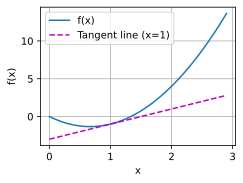

In [35]:
x = np.arange(0,3,0.1)
plot(x, [f(x), 2*x-3],'x','f(x)', legend=['f(x)', 'Tangent line (x=1)'])

Partial Derivatives and Gradients

ex6

In [57]:
def f(x):
    return (x**3) - (1/x)

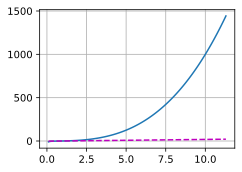

In [73]:
x = np.arange(0.1,11.4,0.1)
plot(x,[f(x), 2*x-2])

Automatic Differentiation

In [74]:
#A Simple Function

In [5]:
import torch
x = torch.arange(4.0)

In [6]:
x.requires_grad_(True)

tensor([0., 1., 2., 3.], requires_grad=True)

In [7]:
y = 2 * torch.dot(x, x)

In [8]:
y

tensor(28., grad_fn=<MulBackward0>)

In [9]:
y.backward()

In [10]:
x.grad

tensor([ 0.,  4.,  8., 12.])

In [11]:
y

tensor(28., grad_fn=<MulBackward0>)

In [12]:
#gradient is not automatically reset

#hence

x.grad.zero_()

tensor([0., 0., 0., 0.])

In [13]:
y = x.sum()

In [14]:
y.backward()

In [15]:
x.grad

tensor([1., 1., 1., 1.])

Detaching COmputation

In [16]:
x.grad.zero_()
y = x*x
u  = y.detach()
z = u*x

In [17]:
z

tensor([ 0.,  1.,  8., 27.], grad_fn=<MulBackward0>)

In [18]:
z.sum().backward()

In [19]:
x.grad == u

tensor([True, True, True, True])

In [20]:
x.grad

tensor([0., 1., 4., 9.])

In [21]:
a = torch.randn(size = (), requires_grad=True)

In [22]:
a

tensor(-0.3983, requires_grad=True)

In [23]:
#ex 4
x = torch.arange(-3,3,0.1)
y = torch.sin(x)



In [24]:
y.detach().numpy()

array([-1.4112000e-01, -2.3924924e-01, -3.3498821e-01, -4.2737985e-01,
       -5.1550144e-01, -5.9847212e-01, -6.7546308e-01, -7.4570525e-01,
       -8.0849636e-01, -8.6320931e-01, -9.0929741e-01, -9.4630009e-01,
       -9.7384763e-01, -9.9166483e-01, -9.9957359e-01, -9.9749500e-01,
       -9.8544973e-01, -9.6355820e-01, -9.3203908e-01, -8.9120740e-01,
       -8.4147096e-01, -7.8332686e-01, -7.1735603e-01, -6.4421767e-01,
       -5.6464249e-01, -4.7942555e-01, -3.8941836e-01, -2.9552022e-01,
       -1.9866934e-01, -9.9833444e-02, -2.3841858e-08,  9.9833399e-02,
        1.9866933e-01,  2.9552022e-01,  3.8941836e-01,  4.7942555e-01,
        5.6464249e-01,  6.4421767e-01,  7.1735609e-01,  7.8332686e-01,
        8.4147096e-01,  8.9120740e-01,  9.3203908e-01,  9.6355820e-01,
        9.8544973e-01,  9.9749500e-01,  9.9957359e-01,  9.9166483e-01,
        9.7384763e-01,  9.4630009e-01,  9.0929741e-01,  8.6320943e-01,
        8.0849636e-01,  7.4570525e-01,  6.7546308e-01,  5.9847212e-01,
      

In [25]:
x.detach().numpy()

array([-3.00000000e+00, -2.90000010e+00, -2.79999995e+00, -2.70000005e+00,
       -2.59999990e+00, -2.50000000e+00, -2.40000010e+00, -2.29999995e+00,
       -2.20000005e+00, -2.10000014e+00, -2.00000000e+00, -1.90000010e+00,
       -1.80000007e+00, -1.70000005e+00, -1.60000002e+00, -1.50000000e+00,
       -1.39999998e+00, -1.29999995e+00, -1.19999993e+00, -1.10000002e+00,
       -1.00000000e+00, -8.99999976e-01, -7.99999952e-01, -6.99999988e-01,
       -6.00000024e-01, -5.00000000e-01, -4.00000036e-01, -3.00000012e-01,
       -2.00000018e-01, -1.00000024e-01, -2.38418583e-08,  9.99999791e-02,
        2.00000003e-01,  3.00000012e-01,  4.00000006e-01,  5.00000000e-01,
        6.00000024e-01,  6.99999988e-01,  8.00000012e-01,  8.99999976e-01,
        1.00000000e+00,  1.10000002e+00,  1.20000005e+00,  1.29999995e+00,
        1.39999998e+00,  1.50000000e+00,  1.60000002e+00,  1.70000005e+00,
        1.79999995e+00,  1.89999998e+00,  2.00000000e+00,  2.09999990e+00,
        2.20000005e+00,  

In [31]:
plot(x,y)

NameError: name 'backend_inline' is not defined

In [32]:
x.grad

In [33]:
y

tensor([-1.4112e-01, -2.3925e-01, -3.3499e-01, -4.2738e-01, -5.1550e-01,
        -5.9847e-01, -6.7546e-01, -7.4571e-01, -8.0850e-01, -8.6321e-01,
        -9.0930e-01, -9.4630e-01, -9.7385e-01, -9.9166e-01, -9.9957e-01,
        -9.9749e-01, -9.8545e-01, -9.6356e-01, -9.3204e-01, -8.9121e-01,
        -8.4147e-01, -7.8333e-01, -7.1736e-01, -6.4422e-01, -5.6464e-01,
        -4.7943e-01, -3.8942e-01, -2.9552e-01, -1.9867e-01, -9.9833e-02,
        -2.3842e-08,  9.9833e-02,  1.9867e-01,  2.9552e-01,  3.8942e-01,
         4.7943e-01,  5.6464e-01,  6.4422e-01,  7.1736e-01,  7.8333e-01,
         8.4147e-01,  8.9121e-01,  9.3204e-01,  9.6356e-01,  9.8545e-01,
         9.9749e-01,  9.9957e-01,  9.9166e-01,  9.7385e-01,  9.4630e-01,
         9.0930e-01,  8.6321e-01,  8.0850e-01,  7.4571e-01,  6.7546e-01,
         5.9847e-01,  5.1550e-01,  4.2738e-01,  3.3499e-01,  2.3925e-01])

In [131]:
x = torch.arange(-3,3,0.1,requires_grad=True)
y = torch.sin(x)

In [132]:
y.sum().backward()

In [133]:
y.sum()

tensor(-0.1411, grad_fn=<SumBackward0>)

In [134]:
x.grad

tensor([-0.9900, -0.9710, -0.9422, -0.9041, -0.8569, -0.8011, -0.7374, -0.6663,
        -0.5885, -0.5048, -0.4161, -0.3233, -0.2272, -0.1288, -0.0292,  0.0707,
         0.1700,  0.2675,  0.3624,  0.4536,  0.5403,  0.6216,  0.6967,  0.7648,
         0.8253,  0.8776,  0.9211,  0.9553,  0.9801,  0.9950,  1.0000,  0.9950,
         0.9801,  0.9553,  0.9211,  0.8776,  0.8253,  0.7648,  0.6967,  0.6216,
         0.5403,  0.4536,  0.3624,  0.2675,  0.1700,  0.0707, -0.0292, -0.1288,
        -0.2272, -0.3233, -0.4161, -0.5048, -0.5885, -0.6663, -0.7374, -0.8011,
        -0.8569, -0.9041, -0.9422, -0.9710])

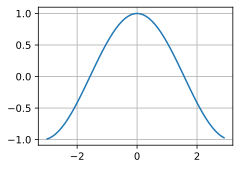

In [135]:
plot(x.detach().numpy(),x.grad.detach().numpy())

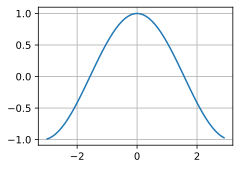

In [117]:
plot(x.detach().numpy(), torch.cos(x).detach().numpy())

In [1]:
import torch
torch.cuda.is_available()

True

In [4]:
torch.cuda.get_device_name()

'NVIDIA GeForce 940MX'

In [137]:
#from np.linalg
def f(x):
    return (torch.log(x**2)*torch.sin(x) + (1/x))

In [138]:
x = torch.arange(1.,10.,0.1, requires_grad=True)

In [139]:
y = f(x)

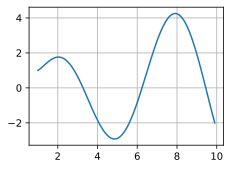

In [140]:
plot(x.detach().numpy(),y.detach().numpy())

In [141]:
y.sum().backward(retain_graph=True)

In [142]:
x.grad

tensor([ 0.6829,  0.8804,  0.9911,  1.0310,  1.0120,  0.9429,  0.8314,  0.6839,
         0.5063,  0.3041,  0.0824, -0.1538, -0.3996, -0.6505, -0.9019, -1.1494,
        -1.3889, -1.6165, -1.8285, -2.0215, -2.1923, -2.3381, -2.4565, -2.5454,
        -2.6031, -2.6284, -2.6204, -2.5786, -2.5032, -2.3944, -2.2532, -2.0808,
        -1.8789, -1.6494, -1.3949, -1.1179, -0.8216, -0.5091, -0.1840,  0.1502,
         0.4895,  0.8301,  1.1681,  1.4994,  1.8202,  2.1266,  2.4149,  2.6816,
         2.9233,  3.1370,  3.3199,  3.4695,  3.5837,  3.6607,  3.6993,  3.6985,
         3.6578,  3.5771,  3.4568,  3.2978,  3.1014,  2.8691,  2.6030,  2.3058,
         1.9801,  1.6292,  1.2566,  0.8659,  0.4613,  0.0467, -0.3734, -0.7947,
        -1.2127, -1.6229, -2.0210, -2.4027, -2.7636, -3.0999, -3.4078, -3.6838,
        -3.9247, -4.1276, -4.2901, -4.4102, -4.4861, -4.5168, -4.5014, -4.4399,
        -4.3324, -4.1796])

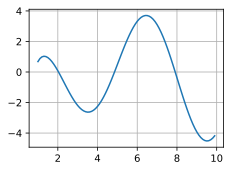

In [143]:
plot(x.detach().numpy(), x.grad.detach().numpy())

In [144]:
y.sum().backward(retain_graph=True)

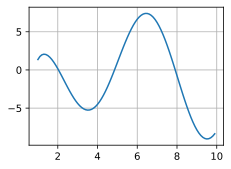

In [145]:
plot(x.detach().numpy(), x.grad.detach().numpy())

In [146]:
x.grad

tensor([ 1.3659,  1.7608,  1.9822,  2.0621,  2.0239,  1.8858,  1.6628,  1.3678,
         1.0126,  0.6082,  0.1648, -0.3076, -0.7993, -1.3010, -1.8037, -2.2988,
        -2.7778, -3.2331, -3.6571, -4.0430, -4.3845, -4.6762, -4.9129, -5.0908,
        -5.2062, -5.2568, -5.2408, -5.1573, -5.0063, -4.7888, -4.5064, -4.1616,
        -3.7577, -3.2989, -2.7898, -2.2359, -1.6432, -1.0182, -0.3679,  0.3003,
         0.9790,  1.6602,  2.3361,  2.9988,  3.6404,  4.2532,  4.8298,  5.3632,
         5.8466,  6.2740,  6.6397,  6.9389,  7.1673,  7.3214,  7.3986,  7.3970,
         7.3155,  7.1542,  6.9137,  6.5957,  6.2027,  5.7381,  5.2061,  4.6116,
         3.9602,  3.2585,  2.5132,  1.7319,  0.9225,  0.0934, -0.7468, -1.5894,
        -2.4254, -3.2459, -4.0421, -4.8053, -5.5272, -6.1999, -6.8157, -7.3676,
        -7.8494, -8.2552, -8.5802, -8.8203, -8.9722, -9.0335, -9.0029, -8.8798,
        -8.6648, -8.3593])

In [147]:
y.sum().backward(retain_graph=True)

In [148]:
x.grad

tensor([  2.0488,   2.6412,   2.9733,   3.0931,   3.0359,   2.8287,   2.4942,
          2.0517,   1.5190,   0.9123,   0.2472,  -0.4613,  -1.1989,  -1.9515,
         -2.7056,  -3.4481,  -4.1668,  -4.8496,  -5.4856,  -6.0645,  -6.5768,
         -7.0142,  -7.3694,  -7.6361,  -7.8093,  -7.8852,  -7.8611,  -7.7359,
         -7.5095,  -7.1832,  -6.7596,  -6.2424,  -5.6366,  -4.9483,  -4.1847,
         -3.3538,  -2.4648,  -1.5273,  -0.5519,   0.4505,   1.4685,   2.4904,
          3.5042,   4.4982,   5.4606,   6.3798,   7.2447,   8.0447,   8.7699,
          9.4110,   9.9596,  10.4084,  10.7510,  10.9822,  11.0979,  11.0954,
         10.9733,  10.7313,  10.3705,   9.8935,   9.3041,   8.6072,   7.8091,
          6.9174,   5.9404,   4.8877,   3.7698,   2.5978,   1.3838,   0.1401,
         -1.1202,  -2.3841,  -3.6380,  -4.8688,  -6.0631,  -7.2080,  -8.2909,
         -9.2998, -10.2235, -11.0514, -11.7740, -12.3828, -12.8703, -13.2305,
        -13.4583, -13.5503, -13.5043, -13.3197, -12.9971, -12.53

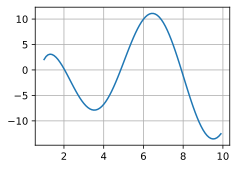

In [149]:
plot(x.detach().numpy(), x.grad.detach().numpy())